# Fraude Carte Bancaire - Pierre Musili
# Projet de classification avec RandomForest et SMOTE

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    RocCurveDisplay, PrecisionRecallDisplay
)

# ================================
# Étape 1 : Chargement des données et exploration
# ================================

In [2]:
df = pd.read_csv("C:\\Users\\pierr\\OneDrive\\Desktop\\DATASET\\creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df['Day'] = df['Time'].apply(lambda x: 1 if x <= 86400 else 2)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


In [8]:
df['Hour'] = (df['Time'] // 3600) % 24

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Day,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0.0


# ================================
# Étape 2 : Analyse des classes
# ================================

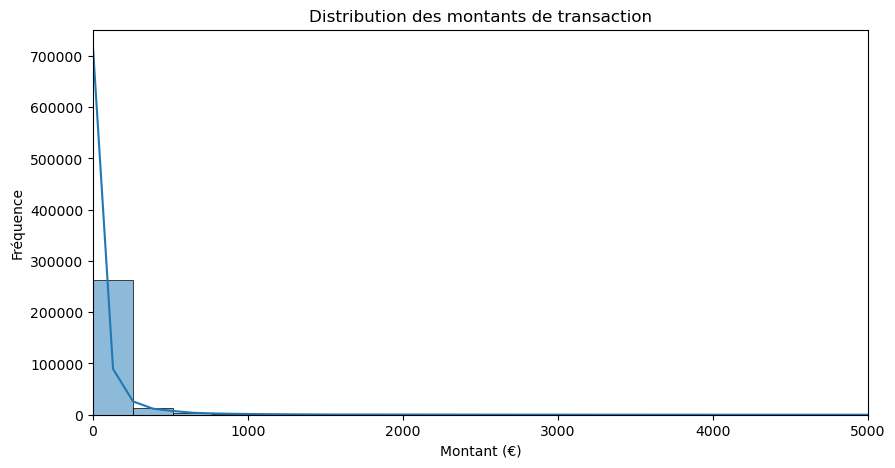

In [10]:
# Detection des transactions et trouver les outliers

plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution des montants de transaction")
plt.xlabel("Montant (€)")
plt.ylabel("Fréquence")
plt.xlim(0, 5000)  # Pour mieux voir les petites valeurs
plt.show()

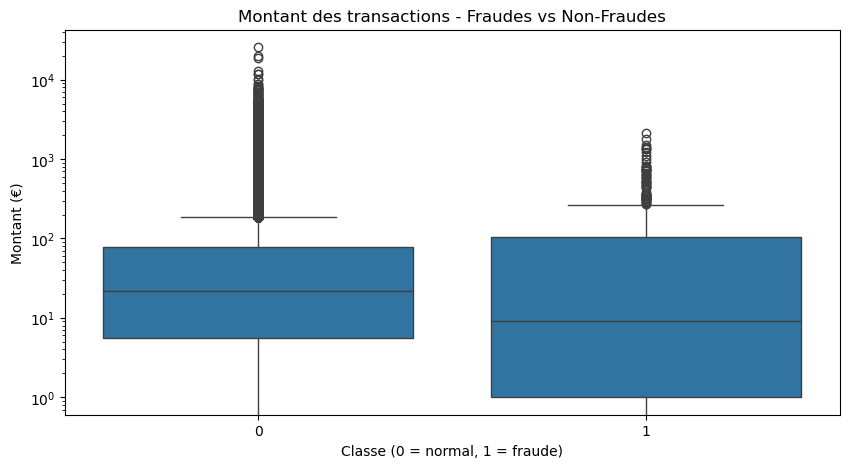

In [11]:
# Comparer les montants entre fraudes et non-fraudes
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Montant des transactions - Fraudes vs Non-Fraudes")
plt.xlabel("Classe (0 = normal, 1 = fraude)")
plt.ylabel("Montant (€)")
plt.yscale('log')  # Échelle logarithmique pour lisibilité
plt.show()


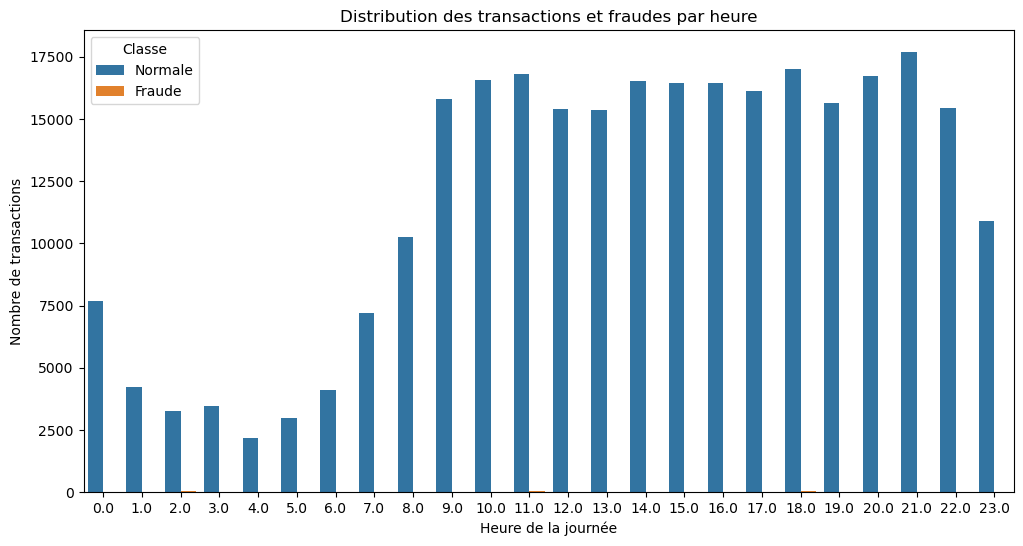

In [12]:
#Transactions et fraudes par heure
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='Class', data=df)
plt.title("Distribution des transactions et fraudes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de transactions")
plt.legend(title='Classe', labels=['Normale', 'Fraude'])
plt.show()


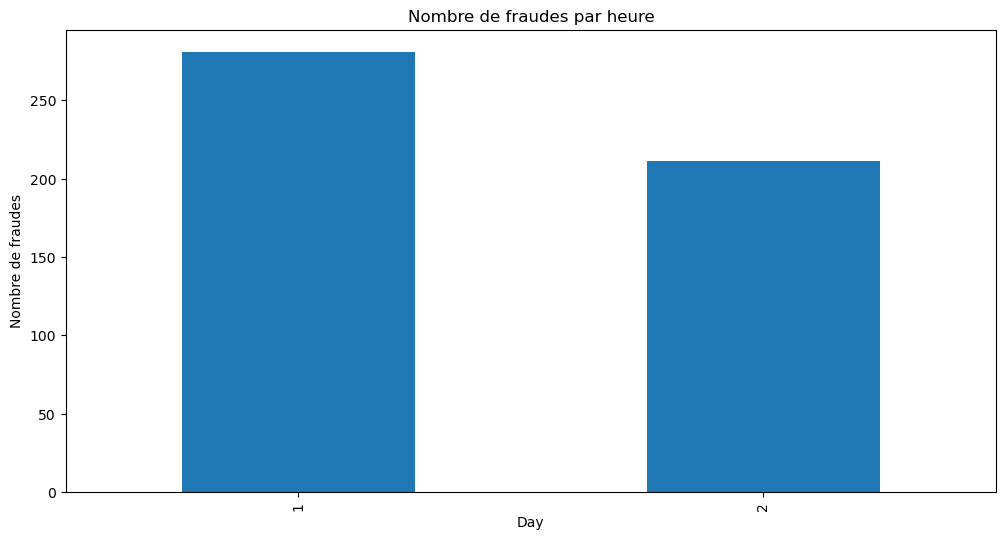

In [14]:
# Fraudes par jour
fraudes_par_jour = df[df['Class'] == 1]['Day'].value_counts()
plt.figure(figsize=(12, 6))
fraudes_par_jour.plot(kind='bar')
plt.title("Nombre de fraudes par heure")
plt.ylabel("Nombre de fraudes")
plt.show()

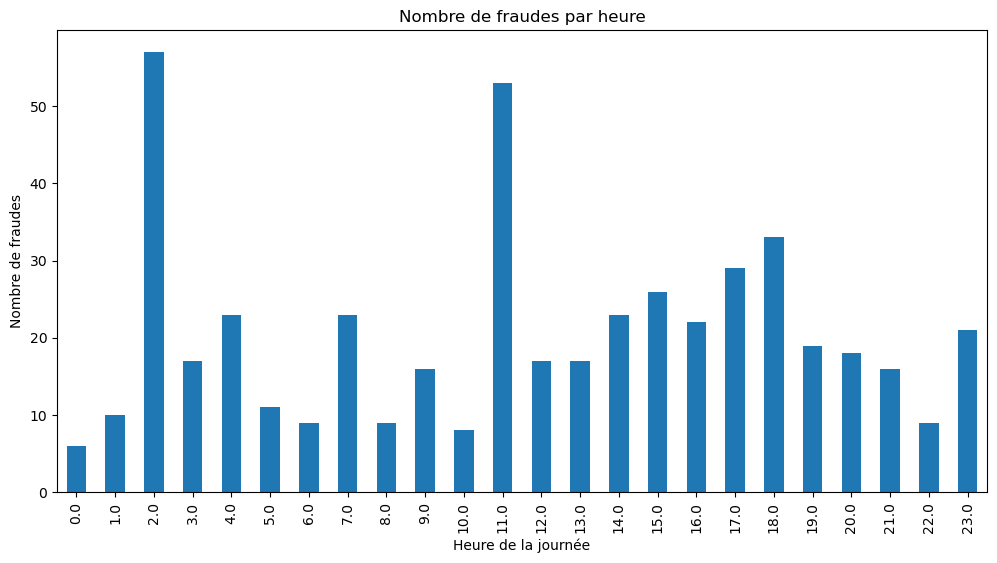

In [15]:
# Fraudes par heure
fraudes_par_heure = df[df['Class'] == 1]['Hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
fraudes_par_heure.plot(kind='bar')
plt.title("Nombre de fraudes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de fraudes")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

df['Amount_scaled']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount_scaled, Length: 284807, dtype: float64

In [17]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

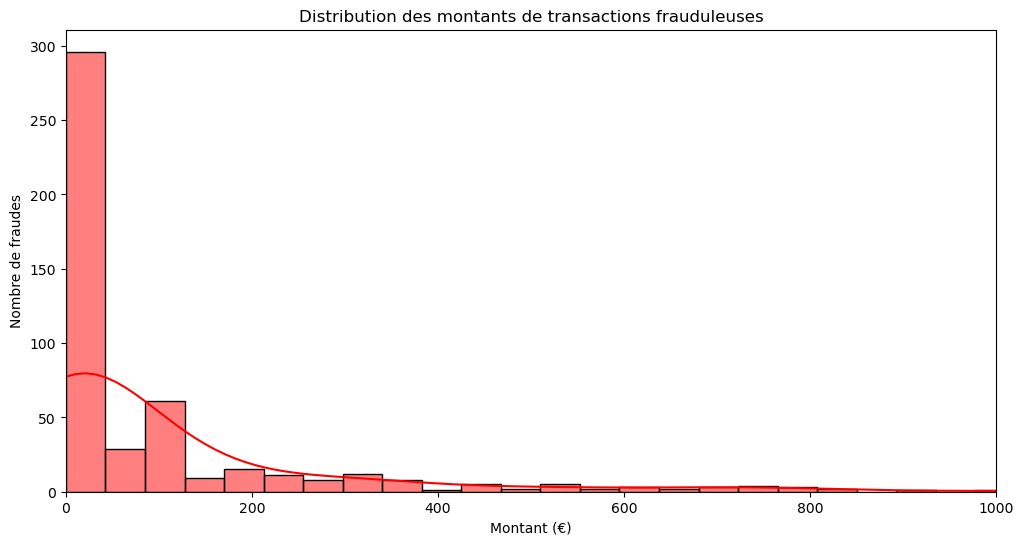

In [18]:

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', kde=True)
plt.title("Distribution des montants de transactions frauduleuses")
plt.xlabel("Montant (€)")
plt.ylabel("Nombre de fraudes")
plt.xlim(0, 1000)
plt.show()


In [19]:
def montant_categorie(x):
    if x == 0:
        return 'zero'
    elif x <= 10:
        return 'petit'
    elif x <= 100:
        return 'moyen'
    else:
        return 'gros'

df['Amount_cat'] = df['Amount'].apply(montant_categorie)


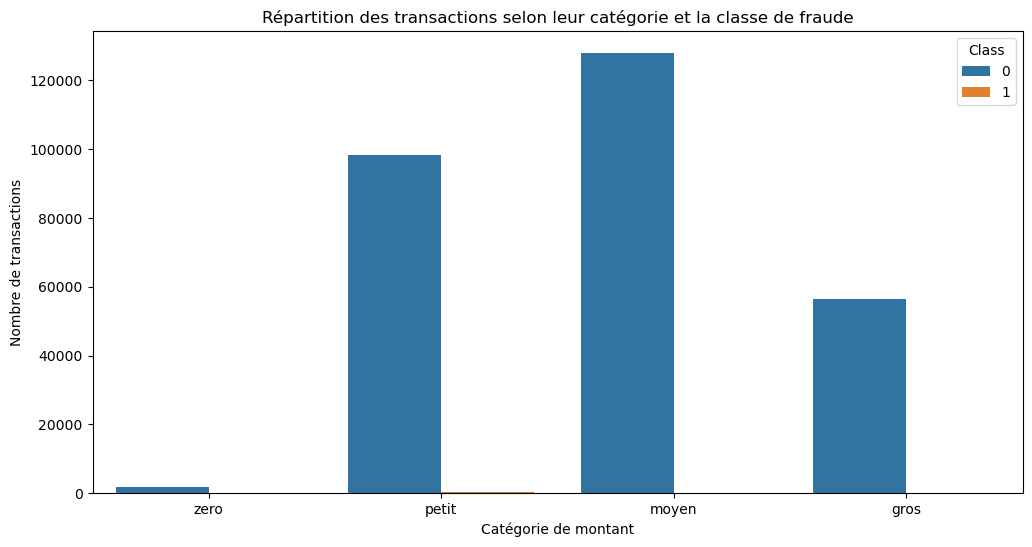

In [20]:
# Trier les catégories par ordre croissant basé sur la valeur médiane de chaque catégorie
order = df.groupby("Amount_cat")["Amount"].median().sort_values().index
plt.figure(figsize=(12, 6))  
sns.countplot(x='Amount_cat', hue='Class', data=df, order=order)
plt.title("Répartition des transactions selon leur catégorie et la classe de fraude")
plt.xlabel("Catégorie de montant")
plt.ylabel("Nombre de transactions")
plt.show()

# Code SMOTE, visualisation des classes avant/après

# ================================
# Étape 3 : Prétraitement des données
# ================================

# - Suppression de 'Amount_cat'
# - StandardScaler

In [23]:
from imblearn.over_sampling import SMOTE

# Séparation des features et de la cible
X = df.drop(['Class', 'Amount_cat'], axis=1)  # On retire aussi 'Amount_cat' ici directement
y = df['Class']

# Application de SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# 3. Affichage des tailles
print("Taille avant SMOTE :", X.shape, y.value_counts())
print("Taille après SMOTE :", X_resampled.shape, y_resampled.value_counts())

C:\Users\pierr\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pierr\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pierr\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pierr\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pierr\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
       

Taille avant SMOTE : (284807, 33) Class
0    284315
1       492
Name: count, dtype: int64
Taille après SMOTE : (568630, 33) Class
0    284315
1    284315
Name: count, dtype: int64


In [25]:
# Part 1 : Split en données d'entraînement et de test (même après SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Part 2 : Pipeline : StandardScaler + RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ================================
# Étape 4 : Entraînement du modèle
# ================================

In [27]:
# Part 3 : Entraînement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

# Pipeline avec RandomForestClassifier

In [28]:
# Part 4 : Prédictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Pour ROC AUC

# ================================
# Étape 5 : Évaluation du modèle équilibré
# ================================

# - Rapport de classification
# - Matrice de confusion
# - ROC AUC
# - PR Curve

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix :


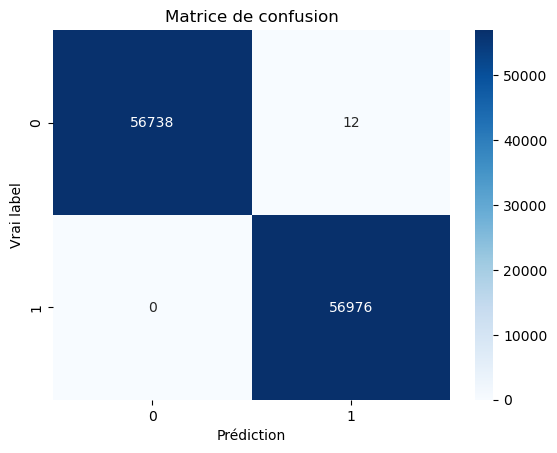

ROC AUC Score : 0.9999992453735833


In [29]:
# Part 5. Évaluation
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()

print("ROC AUC Score :", roc_auc_score(y_test, y_proba))

# ================================
# Étape 6 : Prédiction sur données réelles (déséquilibrées)
# ================================

# - Évaluation réelle sur df complet

In [30]:
# Revenir aux données d'origine (déséquilibrées)
X_orig = df.drop(['Class', 'Amount_cat'], axis=1)
y_orig = df['Class']

# Prétraitement identique (scaling)
X_orig_scaled = StandardScaler().fit_transform(X_orig)

# Prédiction sur les données d'origine
y_pred_real = pipeline.predict(X_orig_scaled)
y_proba_real = pipeline.predict_proba(X_orig_scaled)[:, 1]

# Évaluation réelle
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Évaluation sur les données d'origine (non équilibrées)")
print(classification_report(y_orig, y_pred_real))
print("ROC AUC Score :", roc_auc_score(y_orig, y_proba_real))


C:\Users\pierr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\pierr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Évaluation sur les données d'origine (non équilibrées)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.94      0.76      0.84       492

    accuracy                           1.00    284807
   macro avg       0.97      0.88      0.92    284807
weighted avg       1.00      1.00      1.00    284807

ROC AUC Score : 0.9980561430704437


# - Comparaison de performances à différents seuils

# ================================
# Étape 7, 8 : Visualisation automatique complète
# ================================

# - ROC Curve
# - Precision-Recall
# - Distribution des probabilités

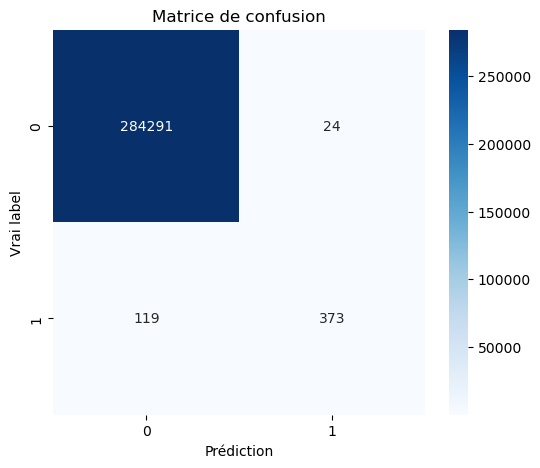

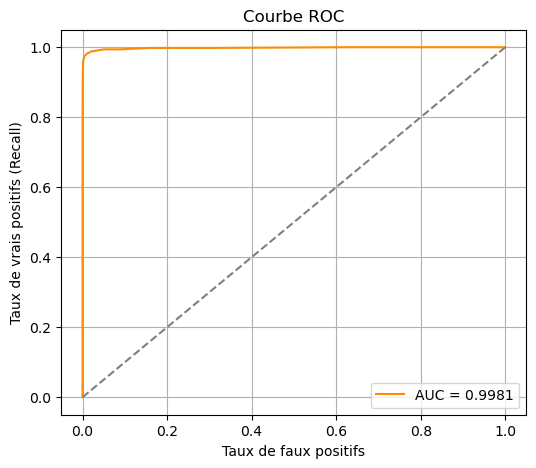

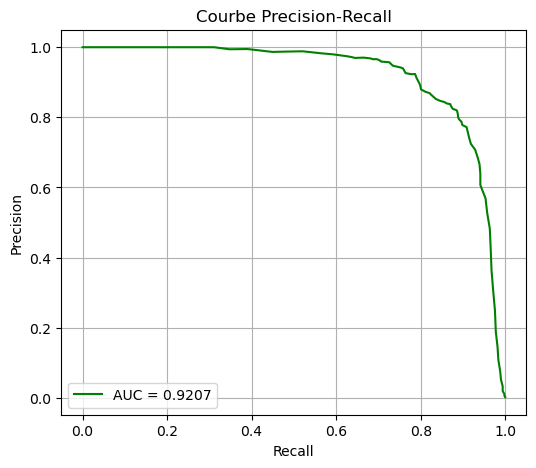

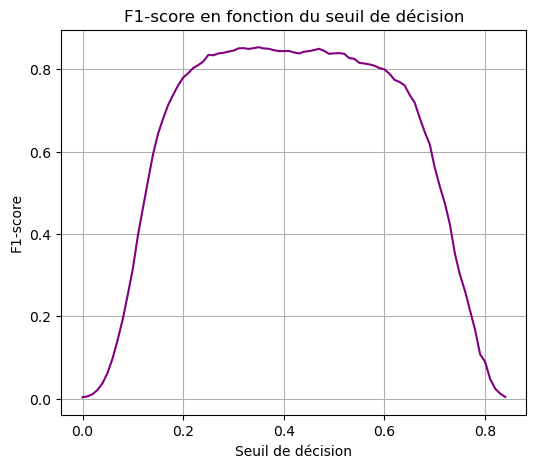


📄 Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.94      0.76      0.84       492

    accuracy                           1.00    284807
   macro avg       0.97      0.88      0.92    284807
weighted avg       1.00      1.00      1.00    284807

🎯 ROC AUC Score : 0.9980561430704437


In [31]:

# --- Prédiction déjà effectuée ---
# y_orig = vraies classes
# y_pred_real = prédictions binaires (0 ou 1)
# y_proba_real = probabilités de fraude

# --- Matrice de confusion ---
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_orig, y_pred_real), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y_orig, y_proba_real)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs (Recall)')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

# --- Courbe Precision-Recall ---
precision, recall, thresholds_pr = precision_recall_curve(y_orig, y_proba_real)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.4f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall')
plt.grid()
plt.legend()
plt.show()

# --- Optionnel : Courbe F1-score selon le seuil ---
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
thresholds = thresholds_pr

plt.figure(figsize=(6,5))
plt.plot(thresholds, f1_scores[:-1], color='purple')
plt.xlabel("Seuil de décision")
plt.ylabel("F1-score")
plt.title("F1-score en fonction du seuil de décision")
plt.grid()
plt.show()

# --- Classification report texte ---
print("\n📄 Rapport de classification :\n")
print(classification_report(y_orig, y_pred_real))

# --- Score global ROC AUC ---
from sklearn.metrics import roc_auc_score
print("🎯 ROC AUC Score :", roc_auc_score(y_orig, y_proba_real))


# ================================
# Fin du projet
# ================================